# LSTM 기반 주가예측모델

## 시계열 데이터 분석 Time Series Data
시계열 데이터란 **시간의 흐름에 따라 관찰하거나 측정한 데이터**를 말한다. 이 데이터는 일반적으로 시간의 순서를 가지며, 특정 시점에서의 값을 나타낸다. 예를 들어, 일일 주식 가격, 시간별 기온, 월별 매출 등이 시계열 데이터의 대표적인 예이다.

**주요 특징**
1. **시간 순서**  
   - 데이터가 시간의 흐름에 따라 정렬되어 있어야 한다. 시간의 순서가 데이터를 분석할 때 중요한 기준이 된다.
2. **시간 종속성**  
   - 이전 시점의 데이터가 이후 시점의 데이터에 영향을 미칠 수 있다.
3. **패턴과 추세**  
   - 주기적인 패턴(계절성)이나 장기적인 변화(추세)를 포함할 수 있다.
4. **불확실성**  
   - 시계열 데이터는 종종 노이즈(잡음)를 포함하며, 예측이 어려울 수 있다.

**활용**
- **금융**: 주식 가격, 환율 변동
- **기상**: 기온, 강수량 예측
- **경제**: GDP, 실업률 변화
- **소비자 행동**: 웹사이트 방문 트래픽, 제품 판매 데이터

**분석 및 모델링 방법**
- **EDA (탐색적 데이터 분석)**  
  - 데이터 시각화, 계절성, 추세 확인
- **통계적 모델링**  
  - ARIMA, SARIMA 등
- **머신러닝**  
  - 시계열 데이터에 특화된 RNN, LSTM, Transformer 등을 활용

시계열 데이터는 과거 데이터를 기반으로 미래를 예측하거나 현재의 상태를 분석하는 데 중요한 역할을 한다.

In [1]:
%pip install finance-datareader

Note: you may need to restart the kernel to use updated packages.


FinanceDataReader(보통 fdr로 임포트)은 파이썬에서 주가/지수/환율 같은 금융 시계열 데이터를 쉽게 가져오게 해주는 라이브러리이다.
pandas.DataFrame 형태로 바로 받아서 분석·시각화·모델링까지 바로 진행 가능하다.

하는 일: 종목 코드(예: 삼성전자 005930), 지수(예: KOSPI), 해외 종목(예: AAPL) 등을 지정해서 기간별 가격 데이터(시가/고가/저가/종가/거래량 등) 를 불러옴  
장점: 웹 크롤링/API 호출을 직접 짤 필요 없이 fdr.DataReader(...) 한 줄로 데이터 로드 가능  
주의: 데이터는 “어디서 가져오느냐(데이터 소스)”에 따라 지원 범위/컬럼/정확도/지연이 조금씩 다를 수 있음

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr  # 금융 데이터 수집 (주가/지수 등)

In [6]:
# FinanceDataReader로 삼성전자 주가 데이터 가져오기
samsung_code = '005930'
samsung = fdr.DataReader(samsung_code)  # 종목코드로 주가 데이터 로드(DataFrame)

samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2013-11-05,30040,30040,29440,29700,160186,NaN
2013-11-06,29959,29959,28979,29020,244368,-0.022896
2013-11-07,29020,29080,28500,28740,260136,-0.009649
2013-11-08,28220,28560,28140,28200,273627,-0.018789
2013-11-11,28500,28680,28180,28560,171277,0.012766
...,...,...,...,...,...,...
2026-01-19,147200,150600,146600,149300,22762497,0.002686
2026-01-20,148500,149300,143900,145200,24059218,-0.027461
2026-01-21,141900,149800,141800,149500,31703610,0.029614


Open : 시작가  
High : 고가  
Low : 저가  
Close : 종가 (이걸 많이 활용)  
Volume : 거래량  
Change : 전일 대비 변화율/량 (데이터 소스에 따라 변동)

In [ ]:
# apple = fdr.DataReader('AAPL')    # 전체 기간
apple = fdr.DataReader('AAPL', '2025-01-01', '2026-01-01')  # 2025년 데이터
apple

,Open,High,Low,Close,Volume,Adj Close
2024-12-31,252.440002,253.279999,249.429993,250.419998,39480700,249.292511
2025-01-02,248.929993,249.100006,241.820007,243.850006,55740700,242.752090
2025-01-03,243.360001,244.179993,241.889999,243.360001,40244100,242.264297
2025-01-06,244.309998,247.330002,243.199997,245.000000,45045600,243.896912
2025-01-07,242.979996,245.550003,241.350006,242.210007,40856000,241.119476
...,...,...,...,...,...,...
2025-12-24,272.339996,275.429993,272.200012,273.809998,17910600,273.809998
2025-12-26,274.160004,275.369995,272.859985,273.399994,21521800,273.399994
2025-12-29,272.690002,274.359985,272.350006,273.760010,23715200,273.760010
2025-12-30,272.809998,274.079987,272.279999,273.079987,22139600,273.079987


## 주식데이터 시각화

In [ ]:
naver_code = '035420'
naver = fdr.DataReader(naver_code)
naver.index    # 날짜 확인 (인덱스가 거래일) => 시계열 처리

DatetimeIndex(['2013-11-05', '2013-11-06', '2013-11-07', '2013-11-08',
               '2013-11-11', '2013-11-12', '2013-11-13', '2013-11-14',
               '2013-11-15', '2013-11-18',
               ...
               '2026-01-12', '2026-01-13', '2026-01-14', '2026-01-15',
               '2026-01-16', '2026-01-19', '2026-01-20', '2026-01-21',
               '2026-01-22', '2026-01-23'],
              dtype='datetime64[ns]', name='Date', length=3000, freq=None)

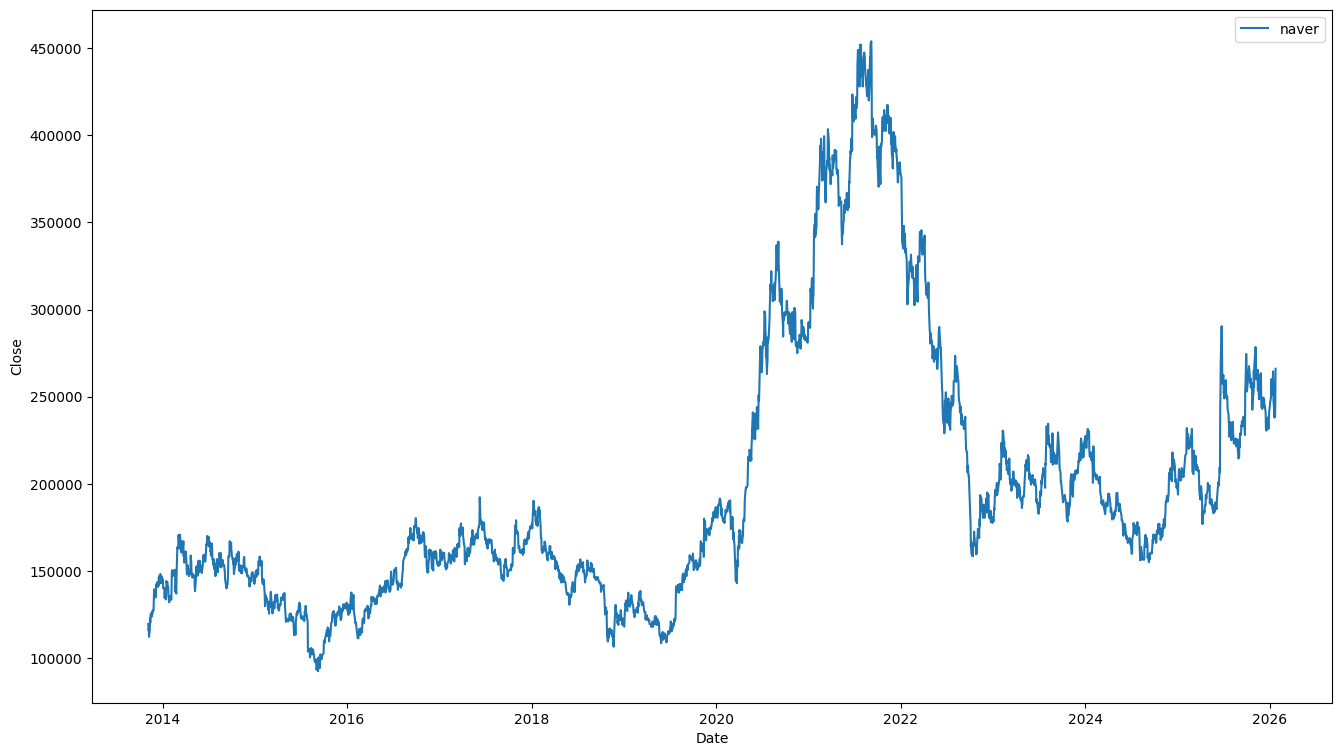

In [15]:
plt.figure(figsize=(16, 9))
plt.plot(naver.index, naver['Close'], label="naver")  # 날짜-종가 시계열 라인 플롯
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

## 학습데이터 생성

In [ ]:
# 종가(Close) 정규화(Min-Max Scaling) : 0 ~ 1
from sklearn.preprocessing import MinMaxScaler

prices = naver['Close'].values    # 종가를 numpy 배열로 추출(1차원)

scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1)).flatten()  # 2D 변환 후 스케일링 -> 1D 변환
prices_scaled

array([0.07505621, 0.06563892, 0.06730112, ..., 0.40398651, 0.42334658,
       0.48004392], shape=(3000,))

In [ ]:
# 시계열 데이터를 window_size 길이만큼 잘라서(슬라이딩 윈도우) 입력(X)와 다음 값(y)으로 만드는 함수
def create_dataset(data, window_size=20):
    X, y = [], []

    for i in range(len(data) - window_size):  # 윈도우가 끝까지 갈 수 있는 구간만 반복
        inputs = data[i: i + window_size]     # 길이 window_size 만큼의 입력 구간
        label = data[i + window_size]         # 입력 다음 시점의 값 (예측 타겟)
        X.append(inputs)
        y.append(label)
    
    return np.array(X), np.array(y)    # 리스트를 numpy 배열로 변환해 반환

X, y = create_dataset(prices_scaled)    # 정규화된 종가로 (X, y) 생성
X.shape, y.shape

((2980, 20), (2980,))

In [ ]:
# 입력 윈도우(X), 타겟(y)를 하나의 DataFrame으로 확인
df = pd.DataFrame(X)    # 입력 시퀀스(X)를 컬럼(윈도우 시점) 단위로 DataFrame 변환
df['target'] = y        # 다음 시점 값(y)를 target 컬럼으로 추가
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.075056,0.065639,0.067301,0.054562,0.065639,0.084474,0.076718,0.087798,0.091675,0.090566,...,0.093335,0.090566,0.096659,0.096659,0.096106,0.111616,0.129895,0.127680,0.124911,0.124355
1,0.065639,0.067301,0.054562,0.065639,0.084474,0.076718,0.087798,0.091675,0.090566,0.086689,...,0.090566,0.096659,0.096659,0.096106,0.111616,0.129895,0.127680,0.124911,0.124355,0.117156
2,0.067301,0.054562,0.065639,0.084474,0.076718,0.087798,0.091675,0.090566,0.086689,0.093335,...,0.096659,0.096659,0.096106,0.111616,0.129895,0.127680,0.124911,0.124355,0.117156,0.118818
3,0.054562,0.065639,0.084474,0.076718,0.087798,0.091675,0.090566,0.086689,0.093335,0.090566,...,0.096659,0.096106,0.111616,0.129895,0.127680,0.124911,0.124355,0.117156,0.118818,0.137650
4,0.065639,0.084474,0.076718,0.087798,0.091675,0.090566,0.086689,0.093335,0.090566,0.096659,...,0.096106,0.111616,0.129895,0.127680,0.124911,0.124355,0.117156,0.118818,0.137650,0.137097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,0.383244,0.381861,0.395689,0.402604,0.399838,0.398455,0.384626,0.413667,0.415049,0.427495,...,0.463450,0.442707,0.438558,0.446855,0.451004,0.475895,0.462067,0.428878,0.423347,0.402604
2976,0.381861,0.395689,0.402604,0.399838,0.398455,0.384626,0.413667,0.415049,0.427495,0.434409,...,0.442707,0.438558,0.446855,0.451004,0.475895,0.462067,0.428878,0.423347,0.402604,0.419198
2977,0.395689,0.402604,0.399838,0.398455,0.384626,0.413667,0.415049,0.427495,0.434409,0.463450,...,0.438558,0.446855,0.451004,0.475895,0.462067,0.428878,0.423347,0.402604,0.419198,0.403987
2978,0.402604,0.399838,0.398455,0.384626,0.413667,0.415049,0.427495,0.434409,0.463450,0.442707,...,0.446855,0.451004,0.475895,0.462067,0.428878,0.423347,0.402604,0.419198,0.403987,0.423347


In [ ]:
# 시계열 입력/타겟을 Pytorch 텐서로 변환 후 차원 맞춰주기
import torch

X_tensor = torch.tensor(X, dtype=torch.float).unsqueeze(-1)  # floatTensor 변환 후 (N, window) -> (N, window, 1)
y_tensor = torch.tensor(y, dtype=torch.float).unsqueeze(-1)  # floatTensor 변환 후 (N,) -> (N, 1)로 출력 차원 맞춤
X_tensor.shape, y_tensor.shape

(torch.Size([2980, 20, 1]), torch.Size([2980, 1]))

In [ ]:
# 시계열 텐서를 학습/검증 으로 분리
train_size = int(len(X_tensor) * 0.8)    # 학습 비율 80% 기준 인덱스
X_train, X_val = X_tensor[:train_size], X_tensor[train_size:]  # 처음~80% 학습, 그 뒤는 검증
y_train, y_val = y_tensor[:train_size], y_tensor[train_size:]

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

torch.Size([2384, 20, 1]) torch.Size([2384, 1])
torch.Size([596, 20, 1]) torch.Size([596, 1])


시계열은 순서가 중요해서 섞지 않고 과거로 학습하고 미래로 검증한다.

## Conv1d 레이어

<img src="https://controlandlearning.wordpress.com/wp-content/uploads/2020/07/figure-1.png" width="500"/>

**1. Conv1d란?**

`nn.Conv1d`는 1차원 시퀀스 데이터를 위한 합성곱 레이어이다.  
예: 시계열 데이터, 텍스트 임베딩 등

**2. 입력/출력 형태**

- 입력 shape: `(batch_size, in_channels, seq_len)`
- 출력 shape: `(batch_size, out_channels, new_seq_len)`

**3. 주요 파라미터**

| 파라미터           | 설명                                        |
| -------------- | ----------------------------------------- |
| `in_channels`  | 입력 채널 수 (예: 임베딩 차원, 또는 이전 conv의 출력 채널 수)  |
| `out_channels` | 출력 채널 수 (필터 개수, convolution 결과 feature 수) |
| `kernel_size`  | 필터 크기 (한 번에 보는 시점의 개수)                    |
| `stride`       | 필터가 이동하는 간격 (기본값=1)                       |
| `padding`      | 입력 시퀀스 앞뒤에 0을 덧붙여서 시퀀스 길이를 조절 (기본값=0)     |


**4.출력길이 계산**

- L: 원래 시퀀스 길이

```
output_length = floor((L + 2 * padding - kernel_size) / stride) + 1
```
위 이미지에서는 패딩이 없으므로 `(5 + 2 * 0 - 2) / 1 + 1 = 4`로 처리

In [ ]:
# Conv1d 입력/출력 차원 변환 흐름 확인 예제 : Conv1D 구조 확인
import torch
import torch.nn as nn

x = torch.randn(1, 20, 1)    # (batch_size, seq_len, input_size)
print('입력', x.shape)

conv1d = nn.Conv1d(
    in_channels = 1,     # 입력 채널 수(특성 수)
    out_channels = 32,   # 필터(커널) 개수 = 출력 채널 수
    kernel_size = 5,     # 커널 길이 (시간축에서 보는 구간)
    padding = 4          # 양쪽 패딩 길이 (출력 길이 조절)
)

x = x.permute(0, 2, 1)   # (B, T, C) -> (B, C, T)로 변환
print('in 차원변환 :', x.shape)
# Conv1D 요구사항: (bath_size, input_size, seq_len)

x = conv1d(x)
print('conv1d 출력 :', x.shape)  # Conv1d 출력 shape

x = x.permute(0, 2, 1)           # (B, C, T) -> (B, T, C)로 다시 변환
print('out 차원변환 :', x.shape)

입력 torch.Size([1, 20, 1])
in 차원변환 : torch.Size([1, 1, 20])
conv1d 출력 : torch.Size([1, 32, 24])
out 차원변환 : torch.Size([1, 24, 32])


## 모델 생성

In [25]:
import torch.nn as nn

# Conv1d로 로컬 패턴을 추출한 뒤 LSTM으로 시계열 요약하고 다음 값을 예측하는 회귀 모델
class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, conv_filters, conv_kernel_size):
        super().__init__()
        self.conv1d = nn.Conv1d(input_size, conv_filters,        # 입력 채널 -> 필터수(출력채널)
                                kernel_size=conv_kernel_size,    # 시간축 커널 길이
                                padding=conv_kernel_size-1       # 길이 보존 / 확장 목적 패딩
                                )
        self.lstm = nn.LSTM(conv_filters, hidden_size,     # Conv 출력채널을 LSTM의 입력으로 사용
                            num_layers, batch_first=True   # (B, T, *) 입력 형태 사용
                            )
        self.fc1 = nn.Linear(hidden_size, 16)              # LSTM 요약 벡터 -> 은닉 16 차원
        self.fc2 = nn.Linear(16, 1)                        # 16 차원 -> 최종 예측값 1개
        self.relu = nn.ReLU()                              # 비선형 활성화함수
    
    def forward(self, x):
        # x = (batch_size, seq_len, input_size)
        x = x.permute(0, 2, 1)           # (B, T, C) -> (B, C, T)로 변환 (Conv1d 입력형태)
        x = self.conv1d(x)               # (B, conv_filters, T')로 합성곱 특징 추출
        x = x.permute(0, 2, 1)           # (B, T', C')로 변환 (LSTM 입력 형태)
        _, (hidden, _) = self.lstm(x)    # hidden: (num_layers, B, H)
        output = self.fc1(hidden[-1])    # 마지막 레이어 은닉상태 (B, H) -> (B, 16)
        output = self.relu(output)       # 비선형 변환
        output = self.fc2(output)        # (B, 16) -> (B, 1)
        return output

## 모델 학습

In [ ]:
# Conv1d + LST 주가 예측 모델 학습/검증 루프 (MSE + Adam)
import torch.optim as optim
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = StockLSTM(
    input_size = 1,         # 입력 특성 수(종가 1개)
    hidden_size = 64,       # LSTM 은닉 크기
    num_layers = 2,         # LSTM 레이어 수
    conv_filters = 32,      # Conv1d 출력 채널 (필터 수)
    conv_kernel_size = 5    # 커널 길이
).to(device)

criterion = nn.MSELoss()    # 회귀 손실 (MSE)
optimizer = optim.Adam(model.parameters(), lr=0.005)

# 학습 설정
epochs = 50
batch_size = 32

for epoch in tqdm(range(epochs)):
    model.train()
    permutation = torch.randperm(X_train.size()[0])    # 학습 데이터 인덱스 셔플
    train_loss = 0

    for i in range(0, X_train.size()[0], batch_size):
        indices = permutation[i : i + batch_size]      # 이번 배치 인덱스 선택
        X_batch = X_train[indices].to(device)
        y_batch = y_train[indices].to(device)

        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    # 검증
    model.eval()
    with torch.no_grad():
        X_val = X_val.to(device)
        y_val = y_val.to(device)
        
        output = model(X_val)
        loss = criterion(output, y_val)
        val_loss = loss.item()
    
    # 에폭 로그 출력
    print(f'Epoch {epoch + 1}/{epochs}: '
          f'Train Loss {train_loss:.6f}, '
          f'Val Loss {val_loss:.6f}')

  2%|▏         | 1/50 [00:00<00:32,  1.52it/s]

Epoch 1/50: Train Loss 1.005473, Val Loss 0.000468


  4%|▍         | 2/50 [00:01<00:29,  1.62it/s]

Epoch 2/50: Train Loss 0.027934, Val Loss 0.000356


  6%|▌         | 3/50 [00:01<00:28,  1.68it/s]

Epoch 3/50: Train Loss 0.023784, Val Loss 0.000394


  8%|▊         | 4/50 [00:02<00:26,  1.72it/s]

Epoch 4/50: Train Loss 0.025632, Val Loss 0.000346


 10%|█         | 5/50 [00:02<00:26,  1.71it/s]

Epoch 5/50: Train Loss 0.026946, Val Loss 0.000431


 12%|█▏        | 6/50 [00:03<00:25,  1.75it/s]

Epoch 6/50: Train Loss 0.032456, Val Loss 0.000488


 14%|█▍        | 7/50 [00:04<00:24,  1.78it/s]

Epoch 7/50: Train Loss 0.025319, Val Loss 0.000304


 16%|█▌        | 8/50 [00:04<00:23,  1.80it/s]

Epoch 8/50: Train Loss 0.042984, Val Loss 0.000368


 18%|█▊        | 9/50 [00:05<00:23,  1.73it/s]

Epoch 9/50: Train Loss 0.022504, Val Loss 0.000281


 20%|██        | 10/50 [00:05<00:23,  1.67it/s]

Epoch 10/50: Train Loss 0.020166, Val Loss 0.000270


 22%|██▏       | 11/50 [00:06<00:24,  1.57it/s]

Epoch 11/50: Train Loss 0.017662, Val Loss 0.000374


 24%|██▍       | 12/50 [00:07<00:24,  1.58it/s]

Epoch 12/50: Train Loss 0.038379, Val Loss 0.000296


 26%|██▌       | 13/50 [00:08<00:25,  1.47it/s]

Epoch 13/50: Train Loss 0.018696, Val Loss 0.000342


 28%|██▊       | 14/50 [00:08<00:24,  1.48it/s]

Epoch 14/50: Train Loss 0.020510, Val Loss 0.000256


 30%|███       | 15/50 [00:09<00:23,  1.49it/s]

Epoch 15/50: Train Loss 0.017002, Val Loss 0.000243


 32%|███▏      | 16/50 [00:10<00:23,  1.48it/s]

Epoch 16/50: Train Loss 0.021183, Val Loss 0.000366


 34%|███▍      | 17/50 [00:10<00:23,  1.43it/s]

Epoch 17/50: Train Loss 0.018162, Val Loss 0.000441


 36%|███▌      | 18/50 [00:11<00:22,  1.42it/s]

Epoch 18/50: Train Loss 0.017724, Val Loss 0.000236


 38%|███▊      | 19/50 [00:12<00:23,  1.31it/s]

Epoch 19/50: Train Loss 0.028042, Val Loss 0.000221


 40%|████      | 20/50 [00:13<00:22,  1.35it/s]

Epoch 20/50: Train Loss 0.016756, Val Loss 0.000223


 42%|████▏     | 21/50 [00:13<00:20,  1.39it/s]

Epoch 21/50: Train Loss 0.021148, Val Loss 0.000236


 44%|████▍     | 22/50 [00:14<00:20,  1.40it/s]

Epoch 22/50: Train Loss 0.017990, Val Loss 0.000235


 46%|████▌     | 23/50 [00:15<00:18,  1.44it/s]

Epoch 23/50: Train Loss 0.015599, Val Loss 0.000272


 48%|████▊     | 24/50 [00:15<00:17,  1.48it/s]

Epoch 24/50: Train Loss 0.016824, Val Loss 0.000231


 50%|█████     | 25/50 [00:16<00:17,  1.44it/s]

Epoch 25/50: Train Loss 0.016042, Val Loss 0.000341


 52%|█████▏    | 26/50 [00:17<00:16,  1.45it/s]

Epoch 26/50: Train Loss 0.017451, Val Loss 0.000248


 54%|█████▍    | 27/50 [00:17<00:15,  1.48it/s]

Epoch 27/50: Train Loss 0.019442, Val Loss 0.000218


 56%|█████▌    | 28/50 [00:18<00:15,  1.44it/s]

Epoch 28/50: Train Loss 0.016833, Val Loss 0.000205


 58%|█████▊    | 29/50 [00:19<00:15,  1.39it/s]

Epoch 29/50: Train Loss 0.016346, Val Loss 0.000236


 60%|██████    | 30/50 [00:20<00:14,  1.35it/s]

Epoch 30/50: Train Loss 0.014763, Val Loss 0.000313


 62%|██████▏   | 31/50 [00:20<00:14,  1.30it/s]

Epoch 31/50: Train Loss 0.019059, Val Loss 0.000293


 64%|██████▍   | 32/50 [00:21<00:14,  1.26it/s]

Epoch 32/50: Train Loss 0.018148, Val Loss 0.000224


 66%|██████▌   | 33/50 [00:22<00:14,  1.20it/s]

Epoch 33/50: Train Loss 0.018873, Val Loss 0.000315


 68%|██████▊   | 34/50 [00:23<00:13,  1.20it/s]

Epoch 34/50: Train Loss 0.029465, Val Loss 0.000399


 70%|███████   | 35/50 [00:24<00:12,  1.20it/s]

Epoch 35/50: Train Loss 0.020716, Val Loss 0.000237


 72%|███████▏  | 36/50 [00:25<00:11,  1.17it/s]

Epoch 36/50: Train Loss 0.016985, Val Loss 0.000210


 74%|███████▍  | 37/50 [00:26<00:10,  1.19it/s]

Epoch 37/50: Train Loss 0.015220, Val Loss 0.000210


 76%|███████▌  | 38/50 [00:26<00:10,  1.19it/s]

Epoch 38/50: Train Loss 0.018336, Val Loss 0.000209


 78%|███████▊  | 39/50 [00:27<00:09,  1.20it/s]

Epoch 39/50: Train Loss 0.019443, Val Loss 0.000255


 80%|████████  | 40/50 [00:28<00:08,  1.14it/s]

Epoch 40/50: Train Loss 0.016543, Val Loss 0.000229


 82%|████████▏ | 41/50 [00:29<00:07,  1.15it/s]

Epoch 41/50: Train Loss 0.020919, Val Loss 0.000352


 84%|████████▍ | 42/50 [00:30<00:07,  1.12it/s]

Epoch 42/50: Train Loss 0.023395, Val Loss 0.000239


 86%|████████▌ | 43/50 [00:31<00:06,  1.14it/s]

Epoch 43/50: Train Loss 0.016151, Val Loss 0.000217


 88%|████████▊ | 44/50 [00:32<00:05,  1.17it/s]

Epoch 44/50: Train Loss 0.015689, Val Loss 0.000326


 90%|█████████ | 45/50 [00:33<00:04,  1.14it/s]

Epoch 45/50: Train Loss 0.020455, Val Loss 0.000391


 92%|█████████▏| 46/50 [00:33<00:03,  1.16it/s]

Epoch 46/50: Train Loss 0.018915, Val Loss 0.000332


 94%|█████████▍| 47/50 [00:34<00:02,  1.18it/s]

Epoch 47/50: Train Loss 0.017885, Val Loss 0.000230


 96%|█████████▌| 48/50 [00:35<00:01,  1.22it/s]

Epoch 48/50: Train Loss 0.014519, Val Loss 0.000209


 98%|█████████▊| 49/50 [00:36<00:00,  1.25it/s]

Epoch 49/50: Train Loss 0.019098, Val Loss 0.000359


100%|██████████| 50/50 [00:37<00:00,  1.35it/s]

Epoch 50/50: Train Loss 0.018939, Val Loss 0.000229


## 모델 예측/시각화

In [ ]:
# 검증셋 예측값 생성 후 스케일 복원(inverse_transform)
model.eval()
with torch.no_grad():
    X_val = X_val.to(device)
    output = model(X_val)
    pred = output.detach().cpu().numpy()    # GPU 텐서를 CPU numpy로 변환

# 스케일 복원
pred_inverse = scaler.inverse_transform(pred)    # 예측값을 원래 가격 스케일로 복원
y_val = y_val.detach().cpu().numpy()             # 실제값도 numpy로 변환
y_val_inverse = scaler.inverse_transform(y_val)  # 실제값을 원래 가격 스케일로 복원

pred_inverse[-1], y_val_inverse[-1]

(array([243454.2], dtype=float32), array([266000.], dtype=float32))

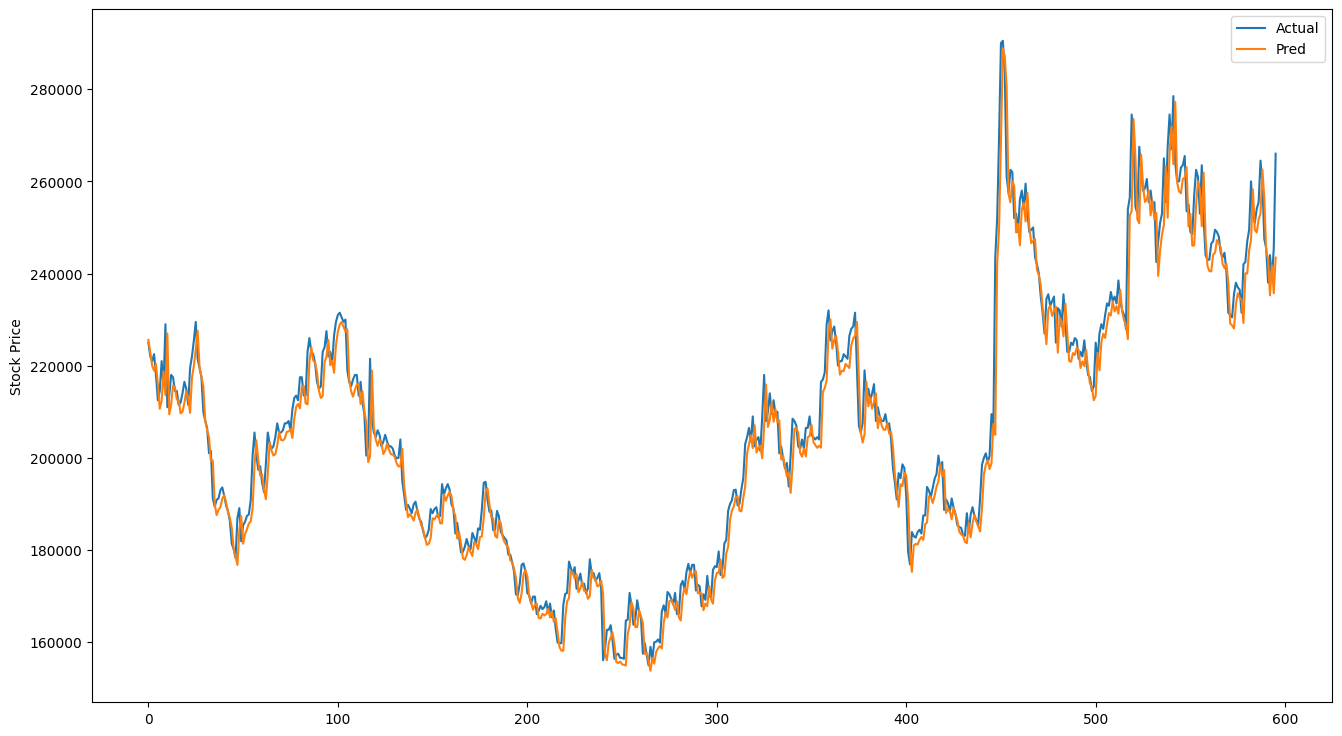

In [28]:
# 실제값 vs 예측값 시계열 비교 그래프
plt.figure(figsize=(16, 9))
plt.plot(y_val_inverse, label='Actual')  # 실제 주가(복원값) 시계열
plt.plot(pred_inverse, label='Pred')     # 예측 주가(복원값) 시계열
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## 모델 예측

In [33]:
# 최근 20일 종가로 다음 주가(1-step) 예측 함수
def predict_next_stock_price(data, model, scaler, device):
    data_scaled = scaler.transform(data.reshape(-1, 1))    # 종가를 2차원으로 변형 후 0~1 범위로 정규화
    data_tensor = torch.tensor(data_scaled, dtype=torch.float).unsqueeze(0)  # (T, 1) -> (1, T, 1)로 배치 차원 추가
    data_tensor = data_tensor.to(device)
    print(data_tensor.shape)

    model.eval()
    with torch.no_grad():
        output = model(data_tensor)
        pred = output.detach().cpu().numpy()
    
    pred_inverse = scaler.inverse_transform(pred)
    return pred_inverse[-1]

# data = naver['Close'].values[-21:-1]
data = naver['Close'].values[-20:]
pred_price = predict_next_stock_price(data, model, scaler, device)
pred_price

torch.Size([1, 20, 1])


array([264510.3], dtype=float32)

최근 20일 패턴을 기반으로 다음 1일 가격을 단일 값으로 추정한다.

In [31]:
data

array([236500, 231500, 242000, 242500, 247000, 249500, 260000, 252500,
       251000, 254000, 255500, 264500, 259500, 247500, 245500, 238000,
       244000, 238500, 245500, 266000])